Projeto final - Introdução a Otimização  
Arthur N Trucco

Grupo 1 - Tema 2
## Problema de Programação Linear com Restrições Probabilísticas ("Chance-Constrained")

## 1. Introdução

### 1.A. Panorama Geral do Projeto

A alocação ótima de portfólios é um problema central em finanças modernas. O objetivo é alocar o capital de um investidor entre diferentes ativos de forma a maximizar o retorno esperado enquanto minimiza o risco associado à incerteza dos retornos. Este problema ganhou notoriedade graças ao trabalho pioneiro de Harry Markowitz (1952), que introduziu a Teoria Moderna do Portfólio (Markowitz, H. "Portfolio Selection," The Journal of Finance, 1952, DOI: 10.2307/2975974).

A abordagem de Markowitz se baseia no equilíbrio entre retorno esperado e risco (medido pelo desvio padrão dos retornos). No entanto, no mundo real, investidores não têm garantia de um retorno exato; em vez disso, os retornos são variáveis aleatórias sujeitas a incertezas.

Problemas de otimização com restrições probabilísticas, também conhecidos como "chance-constrained problems", surgem naturalmente em contextos onde variáveis com incertezas afetam diretamente as restrições do modelo. Em diversas aplicações práticas, como finanças, engenharia, e operações logísticas, existe a necessidade de garantir que as restrições sejam satisfeitas com um nível de confiança pré-determinado, mesmo em face da incerteza.  
  
Esse tipo de problema foi introduzido por Charnes e Cooper na década de 1950 [Charnes & Cooper, 1959](https://en.wikipedia.org/wiki/Chance_constrained_programming) e desde então tem sido amplamente estudado. Uma aplicação relevante é na otimização de carteiras financeiras, onde os retornos dos ativos são tratados como variáveis aleatórias. O objetivo é equilibrar risco e retorno, garantindo que o desempenho satisfaça restrições probabilísticas com alta confiança.  
  
O problema específico que será abordado neste projeto é o seguinte: minimizamos uma função custo linear sujeita a restrições probabilísticas que envolvem variáveis aleatórias gaussianas independentes. Utilizamos propriedades da distribuição normal padrão para converter as restrições probabilísticas em restrições determinísticas equivalentes, transformando o problema em um Problema Cônico de Segunda Ordem (SOCP).  
  
### 1.B. Importância do Problema

A alocação ótima de portfólio tem aplicações práticas em diversas áreas:

   - Gestão de investimentos: Bancos e fundos de investimento utilizam modelos quantitativos para determinar alocações que maximizam o retorno  ajustado ao risco.
   - Seguros e gestão de riscos: Minimização do risco de grandes perdas financeiras em ambientes incertos.
   - Economia comportamental: Investidores com diferentes aversões ao risco podem usar variantes desse modelo.

A abordagem probabilística permite que o investidor especifique um nível de confiança (π) para garantir que o retorno atinja um mínimo aceitável rr com alta probabilidade. Esse modelo é robusto e realista, pois reconhece que o futuro dos retornos financeiros não é determinístico.

#### 1.B.a. Contexto

O problema apresentado trata da alocação ótima de investimentos em uma carteira financeira. O objetivo é maximizar o retorno esperado da carteira, garantindo ao mesmo tempo que a probabilidade de perdas não ultrapasse um certo limite especificado.

## 2. Modelo Matemático
### 2.A Descrição

O problema consiste em determinar um vetor de alocação $x∈\mathbb{R}^n$, onde $x_i$​ representa a fração do capital investido no ativo i, de forma a maximizar o retorno esperado enquanto satisfaz uma restrição de risco probabilística. Os principais elementos são:

Retorno dos ativos:
    Os retornos dos ativos são modelados como uma distribuição normal multivariada:
    $$
    \begin{equation}
        p \sim (\bar{p},Σ)
    \end{equation}
    $$
    

onde:  
$\bar{p} \in \mathbb{R}^n$: vetor de retornos esperados,  
$Σ≻0$: matriz de covariância dos retornos, que mede a variabilidade e correlação entre os ativos.  
Se $p$ é o vetor dos retornos dos ativos, a matriz de covariância Σ é dada por:  
$$
\begin{equation}
\Sigma = \mathbb{E}[(p-\mathbb{E}[p])(p-\mathbb{E}[p])^T],
\end{equation}
$$  
  
$\Sigma \in \mathbb{R}^{n \times n}$  
$\mathbb{E}[p] \rightarrow$ vetor retornos esperados,  
$p \rightarrow$ vetor de retornos alatórios.


Retorno do portfólio:  
O retorno do portfólio R(x)R(x) é dado por:  
$R(x)=p^Tx$  

Como $p∼N(\bar{p},Σ)$, o retorno R(x) segue uma distribuição normal com:  
Média: $E[R(x)]=\bar{p}^Tx$  
$\bar{p}\in\mathbb{R}^n$  
  
Variância: $Var(R(x))=x^TΣx $ 
  

### 2.B. Restrição probabilística:  
Para garantir um nível mínimo de retorno r com probabilidade π, temos: $Prob(R(x)≥r)≥\pi$

Essa restrição pode ser reformulada usando a distribuição cumulativa normal padrão $\phi$ e sua inversa 
$\phi^{−1}$:  
$\bar{p}^Tx−\phi^{−1}(\pi)\sqrt{x^TΣx}≥r$

Restrições adicionais:  
  
A soma das frações investidas deve ser 1 (investimento total):
$\sum_{i=1}^{n} x_i = 1$

Nenhuma fração $x_i$​ pode ser negativa (não são permitidas vendas a descoberto): $x_i ≥ 0,  ∀i$

### 2.C. Modelo SOCP
O problema de otimização final é:  
$$
\begin{aligned}
{\text{maximize}}\qquad& \bar{p}^T x \\
\text{sujeito a:}\qquad& \bar{p}^T x - \phi^{-1}(\pi) ||\Sigma^{1/2}x||_2 \geq r,\\
& \sum_{i=1}^{n} x_i = 1 ,&& x_i \geq 0.
\end{aligned}
$$  
  
Esse é um problema convexo do tipo Second Order Cone Programming (SOCP).

## 3. Solução
### 3.A. Escolha dos valores arbitrários e justificativas  
#### 3.A.a. Vetor de retornos medios
Retornos esperados anuais típicos para classes de ativos: $\bar{p} = [0.08, 0.12, 0.10, 0.07, 0.09]$  [Damodaran, A. - Historical Returns on Stocks, Bonds and Bills: 1928-2023](https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)
  
Esses valores representam retornos esperados de 8%, 12%, 10%, 7%, e 9% ao ano, plausíveis para classes como ações de grande porte, ações de crescimento, títulos de renda fixa, e similares.  

#### 3.A.b. Matriz de covariância $\Sigma$  
Uma matriz de covariância positiva definida é contruída para refletir correlações entre os ativos:  
$$
\Sigma =
\begin{bmatrix}
0.04 & 0.02 & 0.01 & 0.01 & 0.00\\
0.02 & 0.09 & 0.02 & 0.03 & 0.01\\
0.01 & 0.02 & 0.03 & 0.01 & 0.02\\
0.01 & 0.03 & 0.01 & 0.02 & 0.01\\
0.00 & 0.01 & 0.02 & 0.01 & 0.05\\
\end{bmatrix}
$$
  
Diagonal $\rightarrow$ Variância de cada ativo (exemplo: 0.04 corresponde a desvio padrão de 20% anual).  
Fora da diagonal $\rightarrow$ Covariâncias entre ativos (valores positvos refletem correlações moderadas entre os ativos).  
  
#### 3.A.c. Nível de Confiança $\pi$  

Definiu-se um nível de confiança de 95%: $\pi = 0.95$  
Esse valor é usado para calcular o quantil inverso da distribuição normal padrão: $\phi^{-1}(\pi) = \phi^{-1}(0.95) \approx 1.645$  

#### 3.A.d. Nível mínimo de retorno (r) 

Definiu-se um retorno mínimo plausível, como 5% ao ano:  $r = 0.05$  

### 3.B. Código

In [22]:
using JuMP
using ECOS
using LinearAlgebra

# Parâmetros do problema
n = 5  # Número de ativos
r = 0.05  # Retorno mínimo requerido (5%)
π = 0.95  # Nível de confiança (95%)

# Dados do problema
p̄ = [0.08, 0.12, 0.10, 0.07, 0.09]  # Retornos médios esperados
Σ = [  # Matriz de covariância
    0.04  0.02  0.01  0.01  0.00;
    0.02  0.09  0.02  0.03  0.01;
    0.01  0.02  0.03  0.01  0.02;
    0.01  0.03  0.01  0.02  0.01;
    0.00  0.01  0.02  0.01  0.05
]

# Quantil inverso da normal padrão
Φ_inv = 1.645  # Correspondente a π = 0.95

# Modelo SOCP
model = Model(ECOS.Optimizer)

# Variáveis de decisão
@variable(model, x[1:n] >= 0)  # Frações de investimento (não negatividade)

# Função objetivo: maximizar o retorno esperado
@objective(model, Max, dot(p̄, x))

# Restrição 1: Soma das alocações deve ser 1
@constraint(model, sum(x) == 1)

# Restrição 2: Limite de retorno mínimo com probabilidade π
@constraint(model, [
    r - dot(p̄, x);                # Termo escalar
    Φ_inv * Σ^(0.5) * x           # Vetor que define a norma euclidiana ponderada
] in SecondOrderCone())

# Resolução
optimize!(model)

# Resultados
println("Retorno máximo esperado: ", objective_value(model))
println("Alocação ótima: ", value.(x))


Retorno máximo esperado: 0.07712102918083925
Alocação ótima: [0.1868147177056871, 0.007229125512254416, 0.09884954604040923, 0.6045717950925622, 0.10114862713770516]

ECOS 2.0.8 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -9.146e-002  -1.234e-001  +8e+000  6e-001  6e-001  1e+000  1e+000    ---    ---    1  1  - |  -  - 
 1  -9.188e-002  -1.917e-001  +3e+000  1e-001  1e-001  6e-002  4e-001  0.7352  7e-002   1  1  1 |  0  0
 2  -7.335e-002  -1.798e-001  +2e+000  2e+001  3e+000  1e+001  3e-001  0.7485  5e-001   2  2  2 |  0  0
 3  -8.692e-002  -3.904e-001  +4e-001  7e-001  1e-001  1e-002  6e-002  0.8564  8e-002   2  1  1 |  0  0
 4  -7.651e-002  +7.730e-001  +6e-003  1e+000  1e-001  1e+000  8e-004  0.9859  6e-004   2  2  2 |  0  0
 5  -7.671e-002  +1.115e+002  +6e-005  1e+000  1e-001  1e+002  9e-006  0.9890  1e-004   3  3  3 |  0  0
 6  -7.691e-002  +1.013e+

## 4. Resultados Obtidos e Discussão
### 4.A. Resultados numéricos
#### 4.A.a. Retorno máximo esperado
O retorno máximo esperado da carteira foi de 7.71% ao ano.  

#### 4.A.b. Alocação Ótima  
A alocação de recursos nos cinco ativos foi:  $x = [0.1868, 0.0072, 0.0988, 0.6046, 0.1011]$  

Isso indica que aproximadamente 60.46% do portfólio foi investido no ativo 4, enquanto apenas 0.72% foi alocado ao ativo 2.  

### 4.B. Interpretação

Preferência por ativos com baixa covariância $\rightarrow$ O ativo 4 recebeu maior alocação devido ao seu retorno médio moderado (7%) e baixa covariância com outros ativos (refletida nos valores menores fora da diagonal da matriz $\Sigma$).  
  
Ativos com baixa participação $\rightarrow$ O ativo 2 teve uma alocação quase nula (0,72%) apesar de seu retorno esperado mais alto (12%). Isso ocorreu porque ele apresenta uma maior variância individual (0,09) e correlação relativamente alta com outros ativos.  
  
Impacto da Restrição Probabilística $\rightarrow$ A restrição $P(R(x)\geq r) \geq \pi$ impõe um limite de risco, priorizando ativos com menor risco conjunto.

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


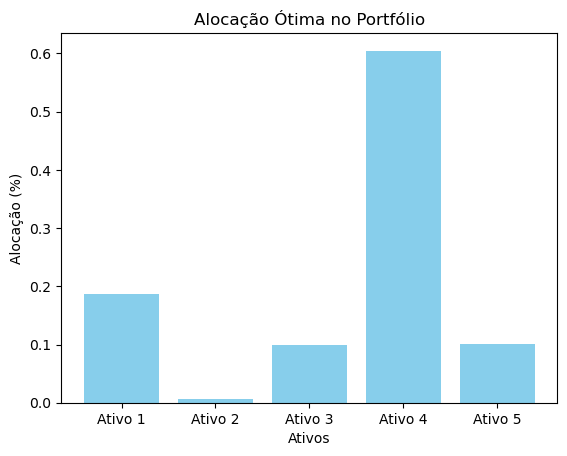

In [23]:
using PyPlot

# Dados para o gráfico
ativos = ["Ativo 1", "Ativo 2", "Ativo 3", "Ativo 4", "Ativo 5"]
alocacao = [0.1868, 0.0072, 0.0988, 0.6046, 0.1011]

# Criar o gráfico de barras
bar(ativos, alocacao, color="skyblue")
xlabel("Ativos")
ylabel("Alocação (%)")
title("Alocação Ótima no Portfólio")
show()


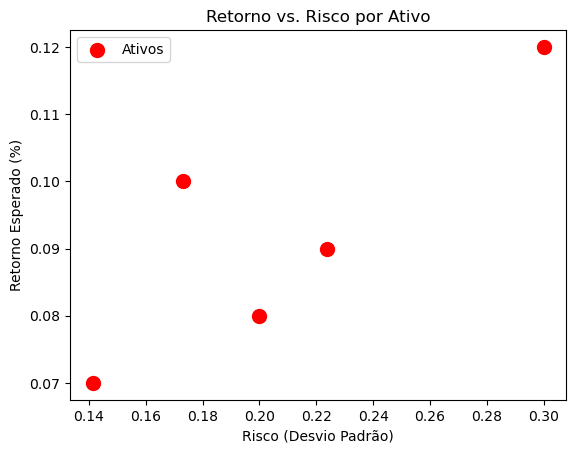

In [24]:
# Dados para o gráfico
retornos = [0.08, 0.12, 0.10, 0.07, 0.09]
riscos = [sqrt(Σ[i, i]) for i in 1:5]  # Desvios padrão (raiz da variância)

# Gráfico de dispersão
scatter(riscos, retornos, color="red", s=100, label="Ativos")
xlabel("Risco (Desvio Padrão)")
ylabel("Retorno Esperado (%)")
title("Retorno vs. Risco por Ativo")
legend()
show()


### 4.C. Análise de Sensibilidade

#### 4.C.a. Variação no nível de confiança  
Aumentar $\pi$ (exemplo: de 95% para 99%) tornaria a restrição de risco mais conservadora. Isso resultaria em redução do retorno máximo esperado, pois o portfólio favoreceria ativos com menor risco.  
  
#### 4.C.b. Alteração do retorno mínimo requerino (r)
Aumentar r (exemplo: de 5% para 8%) forçaria o modelo a buscar ativos mais arriscados ou reestruturar a alocação.  

#### 4.C.c. Impacto das Correlações
Reduzir as correlações entre os ativos (valores fora da diagonal de $\Sigma$) favoreceria maior diversificação no porfólio, resultando em alocações mais equilibradas.  
## 5. Conclusão  
### 5.A. Direções Futuras  
Custos transacionais $\rightarrow$ Adicionar restrições que considerem os custos de transação, como taxas ou impostos, para simular um porfólio mais proximo da realidade.  
  
Risco Estrutual $\rightarrow$ Incorporar cenários de estresse ou choques econômicos para avaliar a robustez do portfólio em situalões adversas.  
  
### 5.B. Resumo
Os resultados demonstram como a otimização de portfólio pode alocar recursos de forma eficiente, maximizando o retorno esperado enquanto gerencia o risco. O modelo apresentado é eficiente para problemas SOCP, mas possui limitações relacionadas às suposições estáticas e distribuição dos dados. Melhorias futuras podem incluir maior realismo no comportamento dos retornos e na evolução dos riscos.